# Darwin's Finches
Following Darwin's Galápagos papers Peter and Rosemary Grant have followed the finches on The island of Daphne Major, publishing `40 Years of Evolution: Darwin's Finches on Daphne Major Island` on Princeton University Press, in 2014

The data is acquired from Dryad Digital Repository h!p://dx.doi.org/10.5061/dryad.g6g3h.

This island has two main finch species (Geospiza scandens, Geospiza fortis), This case study starts with:
- EDA of beak depths in 1975 and 2012 
- Parameter estimates of mean beak depth 
- Hypothesis test: did the beaks get deeper?

Beak depth = (the distance, top to bottom, of a closed beak)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (7,6)
sns.set()

In [2]:
df = pd.read_csv('data/CSF_ds1.csv',delimiter=",")
df.shape

(214, 3)

### EDF
Hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

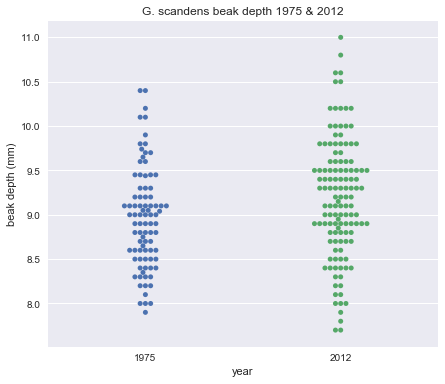

In [3]:
plt.rcParams["figure.figsize"] = (7,6)
# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data = df)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
_ = plt.title('G. scandens beak depth 1975 & 2012')
plt.show()

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [5]:
bd_1975 = df.loc[df.year == 1975,'beak_depth'].values
bd_2012 = df.loc[df.year == 2012,'beak_depth'].values
bl_1975 = df.loc[df.year == 1975,'beak_length'].values
bl_2012 = df.loc[df.year == 2012,'beak_length'].values

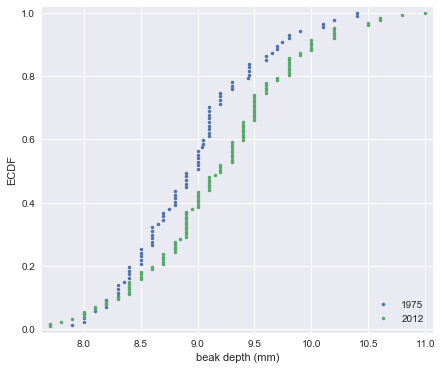

In [6]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

plt.margins(0.02)
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')
plt.show()

## Parameter estimates of beak depths
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [7]:
def bootstrap_replicate_1d(data, func):
    """Draw a single bootstrap replicate."""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [8]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.0555555  0.39198235] mm


## Hypothesis Test: Are beaks deeper in 2012
The ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have become deeper. Is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

**Watch** The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

- Null Hypothesis: The means of the 1975 data and the 2012 data are the same
- Test statistic: mean
- Bootstrap - so shift data to match assumed combined mean,
   - re-sample with replacement and calculate the range of means you get
- Calculate p-value given observed mean-diff and distribution of means you find from the bootstrapped samples

In [9]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0039


We see a p-value of ~0.0034 (0.0029, 0.0045, 0.0038), which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

## How beak length changed with depth
If the change together the beaks got bigger or smaller, if not the beak shaped changed too.
There was a drought in the winter of 1976/1977, perhaps killing many of the plants that made small seeds. Did this have an effect?

In [10]:
small_seeds = [105,690]
large_seeds = [885,815]

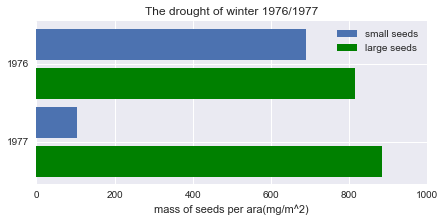

In [11]:
plt.rcParams["figure.figsize"] = (7,3)
plt.barh([1,3], width=small_seeds, label = 'small seeds')
plt.barh([0,2], width=large_seeds, label = 'large seeds', color='g')
plt.yticks([2.5, 0.5], ('1976', '1977'))
plt.xlim([0, 1000])
plt.xlabel('mass of seeds per ara(mg/m^2)')
plt.title('The drought of winter 1976/1977')
plt.legend()
plt.show()

## EDA of beak length and depth

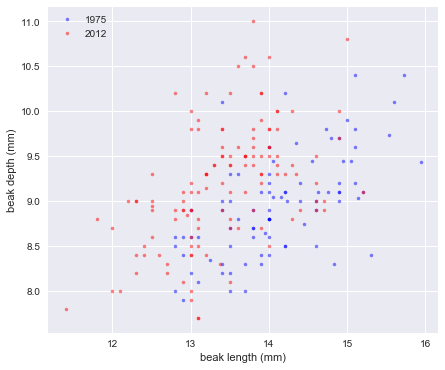

In [12]:
plt.rcParams["figure.figsize"] = (7,6)
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

## Linear regressions and pair bootstrap
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [13]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Array of indicies to sample from
    inds = np.arange(len(x))

    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [14]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, deg=1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, deg=1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5,97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5,97.5])


# Print the results
print('1975: slope =', slope_1975, 'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975, 'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012, 'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012, 'conf int =', intercept_conf_int_2012)

1975: slope = 0.46520516916059385 conf int = [0.32862872 0.58950257]
1975: intercept = 2.3908752365842205 conf int = [0.68081676 4.28966487]
2012: slope = 0.4626303588353129 conf int = [0.33144282 0.59379741]
2012: intercept = 2.9772474982360184 conf int = [1.2018213  4.75009977]


The two data sets have a very similar slope and a different intercept.

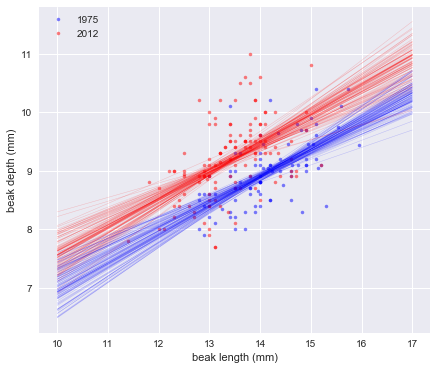

In [15]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

## Beak length to depth ratio - (Bootstrap replicate of means)
The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [16]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55712961 1.60078875]
2012: mean ratio = 1.4658342276847767 conf int = [1.44414418 1.48703673]


In the last exercise, you showed that the mean beak length to depth ratio was 1.58 in 1975 and 1.47 in 2012. The low end of the 1975 99% confidence interval was 1.56 mm and the high end of the 99% confidence interval in 2012 was 1.49 mm. In addition we can say:

The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.

~~It is impossible to say if this is a real effect or just due to noise without computing a p-value. Let me compute the p-value and get back to you.~~ (No, the effect size is really large. Remember, the size of the effect is most important; the p-value is in this case, just the icing on the cake.)

When the confidence intervals are not even close to overlapping, the effect is much bigger than variation. You can do a p-value, but the result is already clear.

# Why do some birds have bigger beaks?
May be because they are cross breading - so how heritable are big beaks?

In [17]:
df = pd.read_csv('data/CSF_ds2.csv',delimiter=",")
df.shape

(413, 4)

In [18]:
bd_parent_fortis = df.loc[:,'bd_parent_fortis'].values
bd_offspring_fortis = df.loc[:,'bd_offspring_fortis'].values
bd_parent_scandens = df.loc[:,'bd_parent_scandens'].dropna().values
bd_offspring_scandens = df.loc[:,'bd_offspring_scandens'].dropna().values

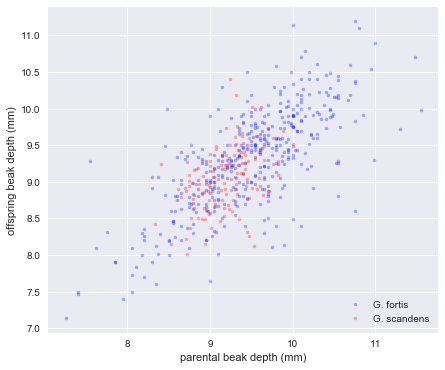

In [19]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.3)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.3)

_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')
plt.show()

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

## Correlation of offspring and parental data - (Pearson correlation with pairs bootstrap)
In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

In [20]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap, computing a single statistic provided by func."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y )

    return bs_replicates

The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use draw_bs_pairs() to compute a 95% confidence interval using pairs bootstrap.

In [21]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [22]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens,
                                       pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis,
                                     pearson_r, 1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294012597 [0.27174127 0.54077233]
G. fortis: 0.7283412395518485 [0.66870284 0.77871306]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

## Measuring heritability - (Bootstrap Pairs calculation, with custom stat)
Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone.

If you are interested in how heritable traits are, the quantity defined as the heritability above is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [23]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685983 [0.33839353 0.73761277]
G. fortis: 0.7229051911438154 [0.64041762 0.79404401]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

## Is beak depth heritable at all in G. scandens? (Pairs permutation test)
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here.

In [24]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. Below is a histogram of the heritability replicates to show how extreme of a value of heritability you might expect by chance.

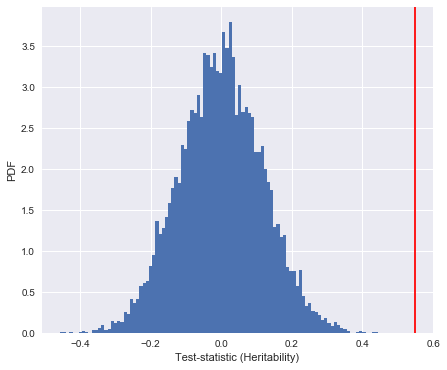

In [26]:
_ = plt.hist(perm_replicates, density=True, bins=100)
_ = plt.axvline(heritability_scandens, color='red')
_ = plt.xlabel('Test-statistic ({})'.format('Heritability'))
_ = plt.ylabel('PDF')
plt.show()